Использование классических алгоритмов ML: логистическая регрессия, полтномиальная регрессия, дерево решений.

In [ ]:
import pandas as pd

df = pd.read_csv("https://raw.githubusercontent.com/obulygin/content/main/car_insurance_data/car_insurance_data.csv")
df

,id,age,gender,race,driving_experience,education,income,credit_score,vehicle_ownership,vehicle_year,married,children,postal_code,annual_mileage,vehicle_type,speeding_violations,DUIs,past_accidents,outcome
0,569520,65+,female,majority,0-9y,high school,upper class,0.629027,True,after 2015,False,True,10238,12000.0,sedan,0,0,0,False
1,750365,16-25,male,majority,0-9y,none,poverty,0.357757,False,before 2015,False,False,10238,16000.0,sedan,0,0,0,True
2,199901,16-25,female,majority,0-9y,high school,working class,0.493146,True,before 2015,False,False,10238,11000.0,sedan,0,0,0,False
3,478866,16-25,male,majority,0-9y,university,working class,0.206013,True,before 2015,False,True,32765,11000.0,sedan,0,0,0,False
4,731664,26-39,male,majority,10-19y,none,working class,0.388366,True,before 2015,False,False,32765,12000.0,sedan,2,0,1,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,323164,26-39,female,majority,10-19y,university,upper class,0.582787,True,before 2015,False,False,10238,16000.0,sedan,0,0,1,False
9996,910346,26-39,female,majority,10-19y,none,middle class,0.522231,True,after 2015,False,True,32765,NaN,sedan,1,0,0,False
9997,468409,26-39,male,majority,0-9y,high school,middle class,0.470940,True,before 2015,False,True,10238,14000.0,sedan,0,0,0,False
9998,903459,26-39,female,majority,10-19y,high school,poverty,0.364185,False,before 2015,False,True,10238,13000.0,sedan,2,0,1,True


Целевая переменная 'outcome' - 1, если клиенту была выплачена страховка, иначе - 0.

Данные содержат следующий набор признаков про каждого клиента:

* 'id' - уникальный номер (id) клиента  
* 'age' - возрастная категория  
* 'gender' - пол  
* 'race' - раса  
* 'driving_experience' - опыт вождения  
* 'education' - образование    
* 'income' - уровень дохода  
* 'credit_score' - кредитный рейтинг  
* 'vehicle_ownership' - факт владения транспортным средством  
* 'vehicle_year' - год выпуска транспортного средства  
* 'married' - семейное положение  
* 'children' - наличие детей  
* 'postal_code' - почтовый индекс  
* 'annual_mileage' - годовой пробег  
* 'vehicle_type' - тип транспортного средства  
* 'speeding_violations' - количество случаев превышения скорости  
* 'DUIs' - количество случаев вождения в нетрезвом виде  
* 'past_accidents' - количество прошлых аварий

1) Прочитать данные.  
2) Проверьте, есть ли в них проблемы, которые помешают дальнейшей работе (пропуски, аномалии, некорректные типы данных).  
3) Проведите базовый EDA.  
4) Постройте модель, которая наиболее хорошо будет прогнозировать факт выплаты по страховке (`outcome`) по выбранным признакам. Самостоятельно выберите и обоснуйте выбор метрики качества.  
5) Напишите выводы о том, какие признаки наиболее значимы для прогноза.

Вы можете использовать любые инструменты подготовки данных, модели и способы их оптимизации, которые вам известны. Единственный критерий - максимизация метрики качества корректными способами.

Во всех действиях, содердащих случайную составляющую, фиксируйте `random_state=42`.


*Сопровождайте все действия, которые могут предполагать альтернативные способы реализации, обоснованием*.

In [ ]:
!pip install phik

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.pipeline import make_pipeline, Pipeline
from sklearn.model_selection import GridSearchCV, KFold, StratifiedKFold, cross_val_predict, train_test_split
from sklearn.metrics import confusion_matrix, classification_report, f1_score
import phik
import plotly.express as px
from sklearn.compose import make_column_transformer, ColumnTransformer
from sklearn.preprocessing import OrdinalEncoder, OneHotEncoder, StandardScaler, PolynomialFeatures
from sklearn.impute import SimpleImputer
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_validate, ParameterGrid

# Результаты

**1. Логистическая регрессия (предобработка с OneHotEncoder())**
Средняя f1 на валидации: 0.7575
f1 на тесте: 0.7460
**2.Логистическая регрессия (предобработка с OrdinalEncoder())**
Средняя f1 на валидации: 0.7486
f1 на тесте: 0.7363
**3. Полиномиальная регрессия**
Средняя f1 на трейне: 0.7559
f1 на тесте: 0.7398
**4.Подбор параметров логистическая регрессия**
Среднее значение f1 при кросс-валидации на трейне: 0.7583
Значение f1 на тесте: 0.7456
**5.Дерево решений /лучший результат/**
Среднее значение f1 при кросс-валидации на трейне: 0.7471
Значение f1 на тесте: 0.7538

# EDA

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 19 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   id                   10000 non-null  int64  
 1   age                  10000 non-null  object 
 2   gender               10000 non-null  object 
 3   race                 10000 non-null  object 
 4   driving_experience   10000 non-null  object 
 5   education            10000 non-null  object 
 6   income               10000 non-null  object 
 7   credit_score         9018 non-null   float64
 8   vehicle_ownership    10000 non-null  bool   
 9   vehicle_year         10000 non-null  object 
 10  married              10000 non-null  bool   
 11  children             10000 non-null  bool   
 12  postal_code          10000 non-null  int64  
 13  annual_mileage       9043 non-null   float64
 14  vehicle_type         10000 non-null  object 
 15  speeding_violations  10000 non-null  

In [ ]:
# классы сбалансированы
df['outcome'].mean()

np.float64(0.3133)

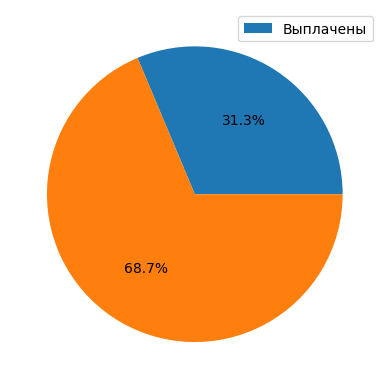

In [ ]:
# Готовим данные для графика
df_gr = df['outcome'].value_counts().sort_values()

# Строим круговую диаграмму
plt.pie(df_gr, autopct='%1.1f%%')

plt.legend(['Выплачены'])

plt.show()

In [ ]:
df=df.drop(columns='id', axis=1)

In [ ]:
df.columns

Index(['age', 'gender', 'race', 'driving_experience', 'education', 'income',
       'credit_score', 'vehicle_ownership', 'vehicle_year', 'married',
       'children', 'postal_code', 'annual_mileage', 'vehicle_type',
       'speeding_violations', 'DUIs', 'past_accidents', 'outcome'],
      dtype='object')

In [ ]:
num_cols = df.select_dtypes(include=['number']).columns.tolist()
cat_cols = df.select_dtypes(include=['object', 'category', 'bool']).columns.tolist()

In [ ]:
df.shape

(10000, 18)

In [ ]:
cat_cols

['age',
 'gender',
 'race',
 'driving_experience',
 'education',
 'income',
 'vehicle_ownership',
 'vehicle_year',
 'married',
 'children',
 'vehicle_type',
 'outcome']

In [ ]:
if 'outcome' in cat_cols:
    cat_cols.remove('outcome')

In [ ]:
num_cols

['credit_score',
 'postal_code',
 'annual_mileage',
 'speeding_violations',
 'DUIs',
 'past_accidents']

In [ ]:
len(cat_cols)+len(num_cols)

17

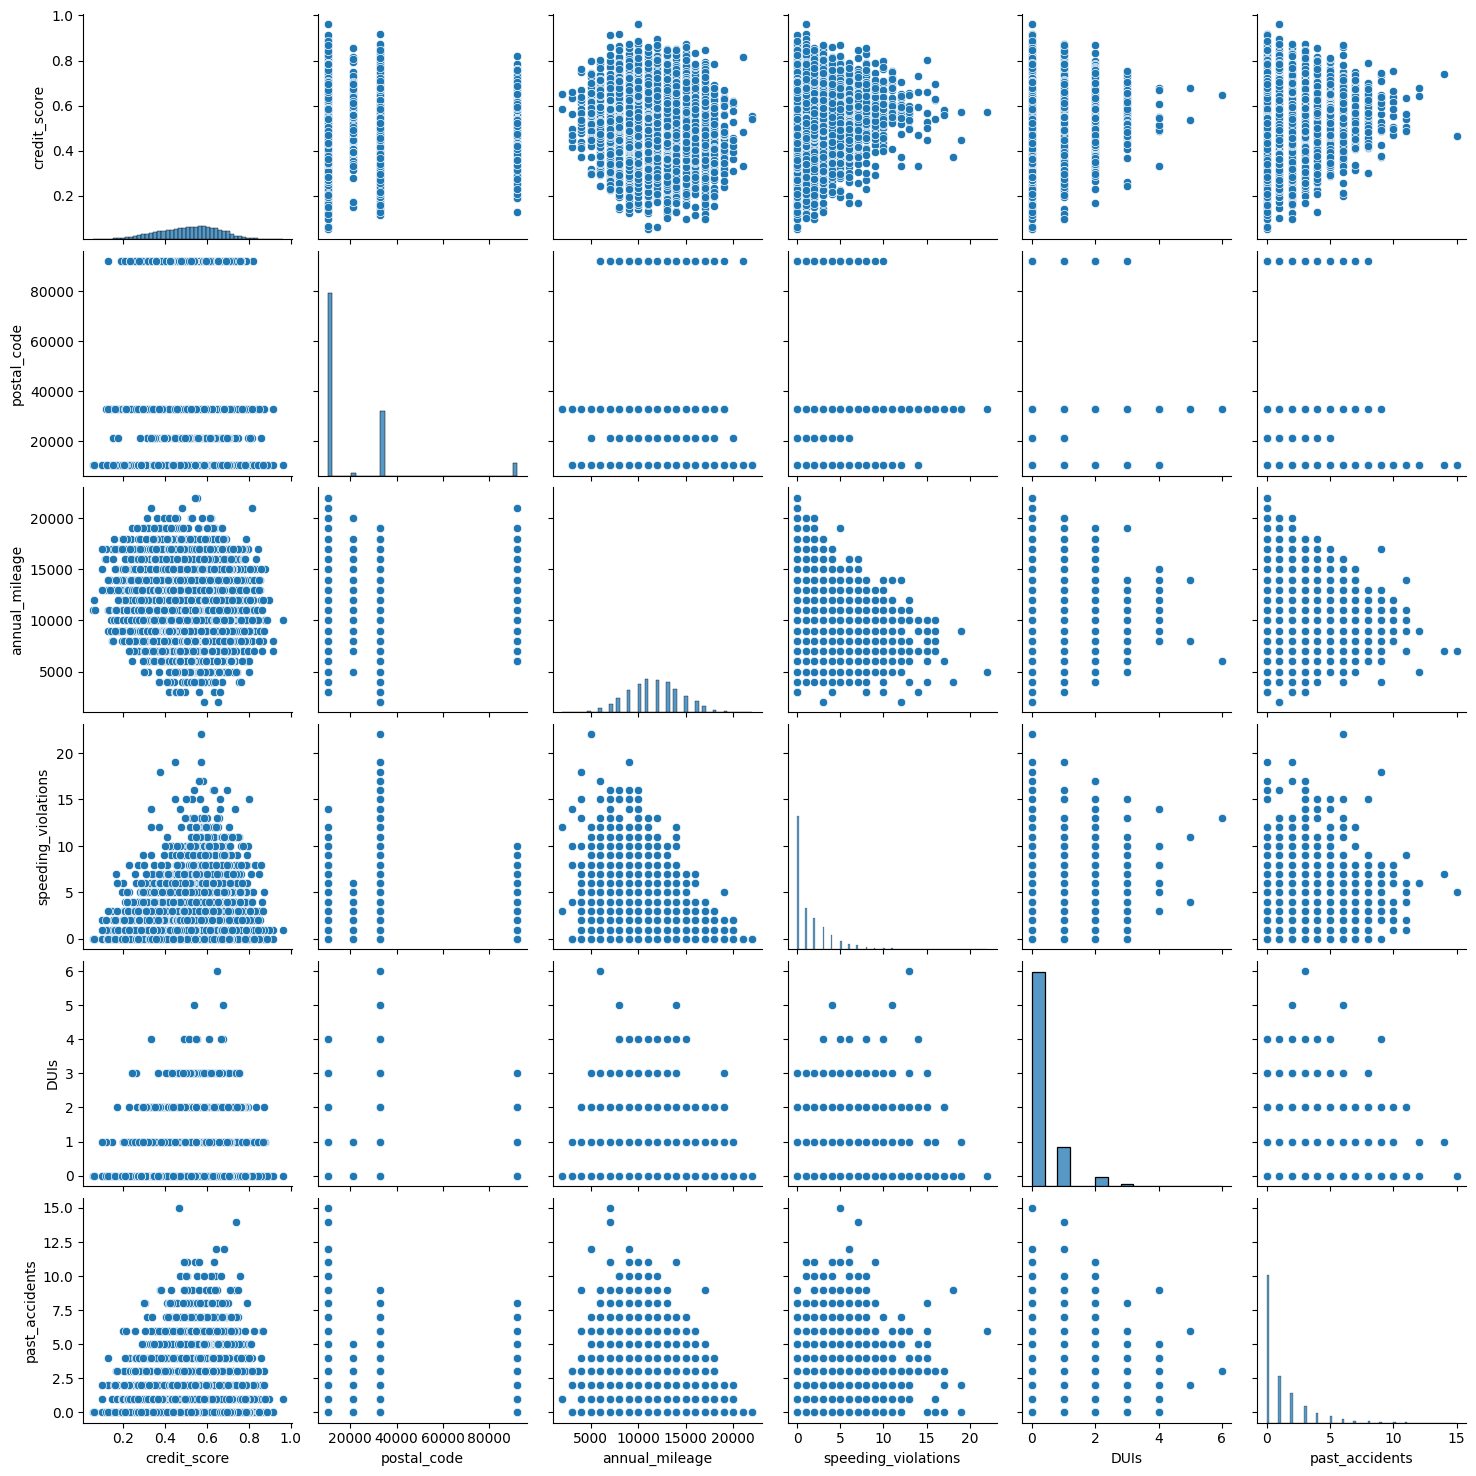

In [ ]:
sns.pairplot(df[num_cols])

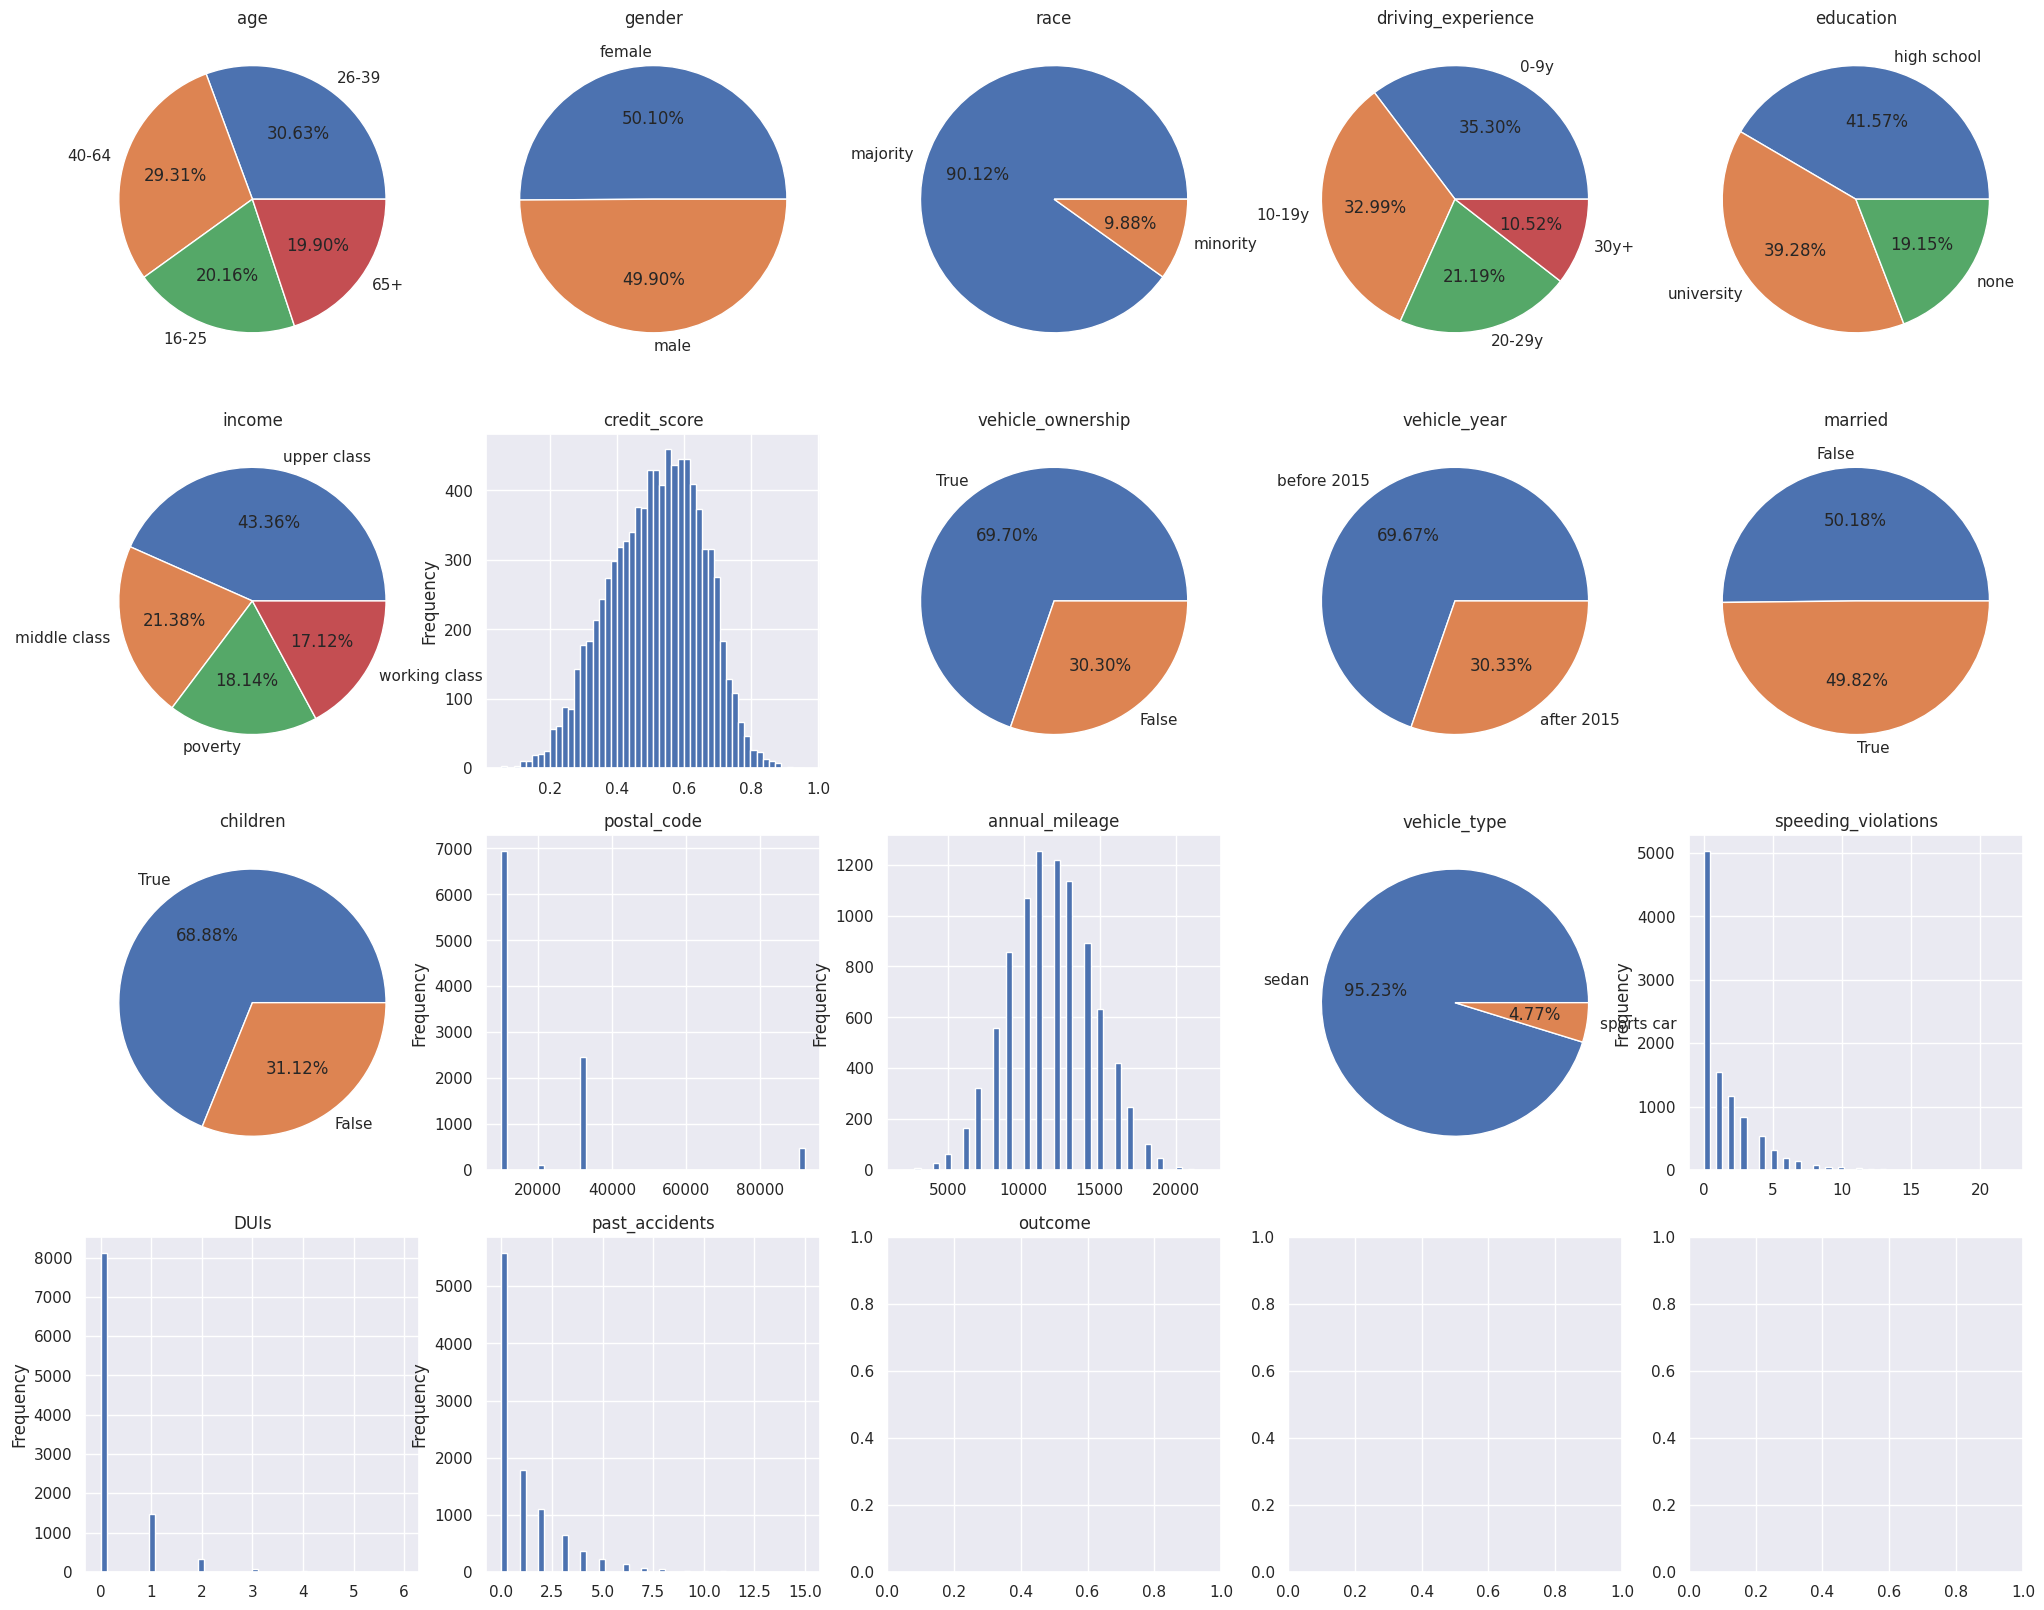

In [ ]:
sns.set_theme()
fig, axes = plt.subplots(nrows=4, ncols=5, figsize=(25, 20))
for ax, col in zip(axes.flatten(), df.columns):
    ax.set_title(col)
    if col in cat_cols:
        ax.pie(df[col].value_counts(), autopct="%.2f%%", labels=df[col].value_counts().index)
    if col in num_cols:
        df[col].plot(kind="hist", ec="black", ax=ax, bins=50)

In [ ]:
df['postal_code'].value_counts()

,count
postal_code,
10238,6940
32765,2456
92101,484
21217,120


In [ ]:
df['DUIs'].value_counts()

,count
DUIs,
0,8118
1,1470
2,331
3,68
4,10
5,2
6,1


In [ ]:
if 'postal_code' in num_cols:
    num_cols.remove('postal_code')

In [ ]:
if 'postal_code' not in cat_cols:
    cat_cols.append('postal_code')
if 'DUIs' not in cat_cols:
    cat_cols.append('DUIs')

In [ ]:
px.imshow(df.phik_matrix(interval_cols=num_cols), text_auto=True, width=900, height=1200)

In [ ]:
df[['DUIs', 'postal_code']] = df[['DUIs', 'postal_code']].astype('object')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 18 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   age                  10000 non-null  object 
 1   gender               10000 non-null  object 
 2   race                 10000 non-null  object 
 3   driving_experience   10000 non-null  object 
 4   education            10000 non-null  object 
 5   income               10000 non-null  object 
 6   credit_score         9018 non-null   float64
 7   vehicle_ownership    10000 non-null  bool   
 8   vehicle_year         10000 non-null  object 
 9   married              10000 non-null  bool   
 10  children             10000 non-null  bool   
 11  postal_code          10000 non-null  object 
 12  annual_mileage       9043 non-null   float64
 13  vehicle_type         10000 non-null  object 
 14  speeding_violations  10000 non-null  int64  
 15  DUIs                 10000 non-null  

In [ ]:
print(df['outcome'].unique())

[False  True]


In [ ]:
df['outcome'] = df['outcome'].astype(str).replace({'True': 1, 'False': 0}).infer_objects()

<ipython-input-30-e4ee7c543f75>:1: FutureWarning:

Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`



In [ ]:
df[cat_cols] = df[cat_cols].astype(str)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(df.drop('outcome', axis=1), df['outcome'], random_state=42)

# Пропуски/Подготовка данных

In [ ]:
def fill_annual_mileage(row, mean_veh):
    #Функция для заполнения annual_mileage на основе vehicle_year
    if pd.isna(row['annual_mileage']):
        return mean_veh.get(row['vehicle_year'], np.nan)
    else:
        return row['annual_mileage']

In [ ]:
mean_veh = X_train.groupby('vehicle_year')['annual_mileage'].mean()
X_train['annual_mileage'] = X_train.apply(fill_annual_mileage, axis=1, mean_veh=mean_veh)

In [ ]:
X_test['annual_mileage'] = X_test.apply(fill_annual_mileage, axis=1, mean_veh=mean_veh)

In [ ]:
df['driving_experience'].unique()

array(['0-9y', '10-19y', '20-29y', '30y+'], dtype=object)

In [ ]:
df['DUIs'].unique()

array(['0', '2', '1', '3', '4', '5', '6'], dtype=object)

In [ ]:
df['age'].unique()

array(['65+', '16-25', '26-39', '40-64'], dtype=object)

In [ ]:
ohe_columns=['gender','race', 'education', 'income', 'vehicle_ownership', 'married', 'children', 'vehicle_type', 'postal_code']

In [ ]:
len(ohe_columns)

9

In [ ]:
cat_cols

['age',
 'gender',
 'race',
 'driving_experience',
 'education',
 'income',
 'vehicle_ownership',
 'vehicle_year',
 'married',
 'children',
 'vehicle_type',
 'postal_code',
 'DUIs']

In [ ]:
df['driving_experience'].unique()

array(['0-9y', '10-19y', '20-29y', '30y+'], dtype=object)

In [ ]:
df['vehicle_year'].unique()

array(['after 2015', 'before 2015'], dtype=object)

In [ ]:
df['vehicle_type'].unique()

array(['sedan', 'sports car'], dtype=object)

In [ ]:
df

,age,gender,race,driving_experience,education,income,credit_score,vehicle_ownership,vehicle_year,married,children,postal_code,annual_mileage,vehicle_type,speeding_violations,DUIs,past_accidents,outcome
0,65+,female,majority,0-9y,high school,upper class,0.629027,True,after 2015,False,True,10238,12000.0,sedan,0,0,0,0
1,16-25,male,majority,0-9y,none,poverty,0.357757,False,before 2015,False,False,10238,16000.0,sedan,0,0,0,1
2,16-25,female,majority,0-9y,high school,working class,0.493146,True,before 2015,False,False,10238,11000.0,sedan,0,0,0,0
3,16-25,male,majority,0-9y,university,working class,0.206013,True,before 2015,False,True,32765,11000.0,sedan,0,0,0,0
4,26-39,male,majority,10-19y,none,working class,0.388366,True,before 2015,False,False,32765,12000.0,sedan,2,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,26-39,female,majority,10-19y,university,upper class,0.582787,True,before 2015,False,False,10238,16000.0,sedan,0,0,1,0
9996,26-39,female,majority,10-19y,none,middle class,0.522231,True,after 2015,False,True,32765,NaN,sedan,1,0,0,0
9997,26-39,male,majority,0-9y,high school,middle class,0.470940,True,before 2015,False,True,10238,14000.0,sedan,0,0,0,0
9998,26-39,female,majority,10-19y,high school,poverty,0.364185,False,before 2015,False,True,10238,13000.0,sedan,2,0,1,1


In [ ]:
# Т к множество столбцоа категориальные и имеют явный порядок, то попробуем использоывать это при кодировании
preprocessor = ColumnTransformer(
    transformers=[
        ('age', OrdinalEncoder(categories=[['65+', '16-25', '26-39', '40-64']]), ['age']),
        ('driving_experience', OrdinalEncoder(categories=[['0-9y', '30y+', '10-19y', '20-29y']]), ['driving_experience']),
        ('vehicle_year', OrdinalEncoder(categories=[['after 2015', 'before 2015']]), ['vehicle_year']),
        ('DUIs', OrdinalEncoder(categories=[['6', '5', '4', '3', '2', '1', '0']]), ['DUIs']),
        ('ohe', OneHotEncoder(drop='first', handle_unknown='ignore' ), ohe_columns),
        ('imputer_credit', SimpleImputer(), ['credit_score'])
    ],
    remainder='passthrough',
    verbose_feature_names_out=False
)

In [ ]:
# Не используем порядковое кодирование
preprocessor1 = ColumnTransformer(
    transformers=[
        ('ohe', OneHotEncoder(drop='first', handle_unknown='ignore'), cat_cols),
        ('imputer_credit', SimpleImputer(), ['credit_score'])
    ],
    remainder='passthrough',
    verbose_feature_names_out=False
)

In [ ]:
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Логистическая регрессия (предобработка с OneHotEncoder())

In [ ]:
pipeline = make_pipeline(preprocessor1, StandardScaler(), LogisticRegression(random_state=42, n_jobs=-1, class_weight='balanced'))
# Обучаем модель, минимизируя logloss
pipeline.fit(X_train, y_train)

# Выводим результирующие коэффициенты
print(f'w0: {pipeline.named_steps["logisticregression"].intercept_}') #свободный член w0
print(f'w1, w2: {pipeline.named_steps["logisticregression"].coef_}') #остальные параметры модели w1, w2, ..., wm
y_pred = pipeline.predict(X_test)

w0: [-0.96780587]
w1, w2: [[ 8.82484109e-03 -4.29011842e-03  4.50443064e-02  5.55387341e-01
  -8.00666875e-02 -9.72919048e-01 -1.65723981e+00 -1.59006901e+00
   1.86770452e-02 -1.58552812e-02  2.76857721e-03 -4.75236928e-02
   3.46688850e-03 -8.93569950e-01  8.93587289e-01 -1.75981112e-01
  -4.99601579e-02  4.65945208e-05  1.23107919e+00  5.78053875e-01
   3.71950871e-01  3.78041369e-02 -4.93967063e-02  4.55458851e-02
   8.91546758e-02 -5.98612138e-02 -2.72741068e-02 -1.35736957e-02
   3.47312122e-01  4.54151577e-02 -1.58575360e-01]]


In [ ]:
# Вычисляем метрики с использованием кросс-валидации
results = cross_validate(pipeline, X_train, y_train, cv=cv, scoring='f1', return_train_score=True)
score = f1_score(y_test, y_pred)

print(f'Средняя f1 на валидации: {results["test_score"].mean():.4f}')
print(f'f1 на тесте: {score:.4f}')

/usr/local/lib/python3.11/dist-packages/sklearn/preprocessing/_encoders.py:246: UserWarning:

Found unknown categories in columns [12] during transform. These unknown categories will be encoded as all zeros



Средняя f1 на валидации: 0.7732
f1 на тесте: 0.7630


# Логистическая регрессия (предобработка с OrdinalEncoder())

In [ ]:
pipeline = make_pipeline(preprocessor, StandardScaler(), LogisticRegression(random_state=42, n_jobs=-1, class_weight='balanced'))
# Обучаем модель, минимизируя logloss
pipeline.fit(X_train, y_train)

# Выводим результирующие коэффициенты
print(f'w0: {pipeline.named_steps["logisticregression"].intercept_}') #свободный член w0
print(f'w1, w2: {pipeline.named_steps["logisticregression"].coef_}') #остальные параметры модели w1, w2, ..., wm
y_pred = pipeline.predict(X_test)

w0: [-0.73608265]
w1, w2: [[ 1.68274754e-01 -1.11064232e+00  8.71609558e-01  5.48968687e-02
   6.47343778e-01 -6.97531259e-02  9.80360340e-03  2.77513379e-02
   6.96600413e-02 -1.36857541e-01  3.83308654e-02 -8.64549880e-01
  -1.83646963e-01 -8.48346076e-02 -1.08512870e-03  1.15807602e+00
   6.05106277e-01  3.27918843e-01 -1.35068538e-02  2.71971372e-01
  -3.39886134e-01 -4.56928433e-01]]


In [ ]:
# Вычисляем метрики с использованием кросс-валидации
results = cross_validate(pipeline, X_train, y_train, cv=cv, scoring='f1', return_train_score=True)
score = f1_score(y_test, y_pred)

print(f'Средняя f1 на валидации: {results["test_score"].mean():.4f}')
print(f'f1 на тесте: {score:.4f}')

Средняя f1 на валидации: 0.7652
f1 на тесте: 0.7543


# Полиномиальная регрессия

In [ ]:
pipeline_poly = make_pipeline(preprocessor1,
                              PolynomialFeatures(degree=2, include_bias=False),
                              StandardScaler(),
                              LogisticRegression(random_state=42, n_jobs=-1, class_weight='balanced'))

In [ ]:
# Обучаем модель, минимизируя logloss
pipeline_poly.fit(X_train, y_train)

/usr/local/lib/python3.11/dist-packages/sklearn/compose/_column_transformer.py:1667: FutureWarning:


The format of the columns of the 'remainder' transformer in ColumnTransformer.transformers_ will change in version 1.7 to match the format of the other transformers.
At the moment the remainder columns are stored as indices (of type int). With the same ColumnTransformer configuration, in the future they will be stored as column names (of type str).
To use the new behavior now and suppress this warning, use ColumnTransformer(force_int_remainder_cols=False).




Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('ohe',
                                                  OneHotEncoder(drop='first',
                                                                handle_unknown='ignore'),
                                                  ['age', 'gender', 'race',
                                                   'driving_experience',
                                                   'education', 'income',
                                                   'vehicle_ownership',
                                                   'vehicle_year', 'married',
                                                   'children', 'vehicle_type',
                                                   'postal_code', 'DUIs']),
                                                 ('imputer_credit',
                                                  SimpleImputer(),
                                                  ['credit_score'])],
                                   verbose_feature_names_out=False)),
                ('polynomialfeatures', PolynomialFeatures(include_bias=False)),
                ('standardscaler', StandardScaler()),
                ('logisticregression',
                 LogisticRegression(class_weight='balanced', n_jobs=-1,
                                    random_state=42))])

In [ ]:
y_pred = pipeline_poly.predict(X_test)
y_pred

array([1, 0, 1, ..., 0, 0, 0])

In [ ]:
results = cross_validate(pipeline_poly, X_train, y_train, cv=cv, scoring='f1', return_train_score=True)
score = f1_score(y_test, y_pred)

print(f'Средняя f1 на трейне: {results["test_score"].mean():.4f}')
print(f'f1 на тесте: {score:.4f}')

/usr/local/lib/python3.11/dist-packages/sklearn/preprocessing/_encoders.py:246: UserWarning:

Found unknown categories in columns [12] during transform. These unknown categories will be encoded as all zeros



Средняя f1 на трейне: 0.7613
f1 на тесте: 0.7520


# Подбор параметров логистическая регрессия

In [ ]:
pipeline = Pipeline([
    ('prep', preprocessor1),         # заполнение пропусков
    ('scaler', StandardScaler()),         # нормализация данных
    ('classifier', LogisticRegression(random_state=42, n_jobs=-1, class_weight='balanced'))  # модель логистической регрессии
])

param_grid = {
    'classifier__C': [0.01, 0.1, 1, 10, 100],             # обратный коэффициент регуляризации
    'classifier__penalty': ['l1', 'l2', 'elasticnet'],     # тип регуляризации
    'classifier__solver': ['liblinear', 'saga'],          # алгоритм оптимизации
    'classifier__l1_ratio': [0.1, 0.2, 0.3, 0.4],              # только если penalty='elasticnet'
    'classifier__max_iter': [100, 200, 300]               # максимальное число итераций
}

param_grids = [
    # Группа 1: elasticnet + saga
    {
        'classifier__C': [0.01, 0.1, 1, 10, 100],
        'classifier__penalty': ['elasticnet'],
        'classifier__solver': ['saga'],
        'classifier__l1_ratio': [0.1, 0.2, 0.3, 0.4],
        'classifier__max_iter': [100, 200, 300]
    },

    # Группа 2: l1, l2 + liblinear
    {
        'classifier__C': [0.01, 0.1, 1, 10, 100],
        'classifier__penalty': ['l1', 'l2'],
        'classifier__solver': ['liblinear'],
        'classifier__max_iter': [100, 200, 300]
    }
]

# Объединяем все сетки в один список всех возможных комбинаций
from sklearn.model_selection import ParameterGrid
all_params = []
for grid in param_grids:
    all_params.extend(ParameterGrid(grid))

grid = GridSearchCV(pipeline,
                          param_grid=param_grid,
                          cv=cv,
                          scoring='f1',
                          n_jobs=-1)

grid.fit(X_train, y_train)

/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_validation.py:528: FitFailedWarning:


300 fits failed out of a total of 1800.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
300 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.11/dist-packages/sklearn/base.py", line 1389, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/sklearn/pipeline.py", line 662, in fit
    self._final_estimator.fit(Xt, y,

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=42, shuffle=True),
             estimator=Pipeline(steps=[('prep',
                                        ColumnTransformer(remainder='passthrough',
                                                          transformers=[('ohe',
                                                                         OneHotEncoder(drop='first',
                                                                                       handle_unknown='ignore'),
                                                                         ['age',
                                                                          'gender',
                                                                          'race',
                                                                          'driving_experience',
                                                                          'education',
                                                                          'income',
                                                                          'vehicle_ownership',
                                                                          'vehicle_year',
                                                                          'married',
                                                                          'children',
                                                                          'vehicl...
                                       ('scaler', StandardScaler()),
                                       ('classifier',
                                        LogisticRegression(class_weight='balanced',
                                                           n_jobs=-1,
                                                           random_state=42))]),
             n_jobs=-1,
             param_grid={'classifier__C': [0.01, 0.1, 1, 10, 100],
                         'classifier__l1_ratio': [0.1, 0.2, 0.3, 0.4],
                         'classifier__max_iter': [100, 200, 300],
                         'classifier__penalty': ['l1', 'l2', 'elasticnet'],
                         'classifier__solver': ['liblinear', 'saga']},
             scoring='f1')

In [ ]:
y_pred = grid.predict(X_test)

# Расчёт F1-метрики
test_f1 = f1_score(y_test, y_pred)

# Лучшие параметры
print("Лучшие параметры:", grid.best_params_)
print(f"Среднее значение f1 при кросс-валидации на трейне: {grid.best_score_.mean():.4f}")
print(f"Значение f1 на тесте: {test_f1:.4f}")

Лучшие параметры: {'classifier__C': 0.1, 'classifier__l1_ratio': 0.1, 'classifier__max_iter': 100, 'classifier__penalty': 'l2', 'classifier__solver': 'liblinear'}
Среднее значение f1 при кросс-валидации на трейне: 0.7583
Значение f1 на тесте: 0.7456


# Дерево решений

In [ ]:
# Пайплайн
dtc_pipe = make_pipeline(preprocessor1, StandardScaler(), DecisionTreeClassifier(random_state=42))

# Настройки поиска
param_grid = {
    'decisiontreeclassifier__max_depth': range(2, 8),
    'decisiontreeclassifier__min_samples_leaf': range(1, 6),
    'decisiontreeclassifier__class_weight': [None, 'balanced']
}


gs = GridSearchCV(dtc_pipe,
                  param_grid,
                  cv=cv,
                  scoring='f1',
                  n_jobs=-1,
                  verbose=1)

# Обучение
gs.fit(X_train, y_train)

Fitting 5 folds for each of 60 candidates, totalling 300 fits


/usr/local/lib/python3.11/dist-packages/sklearn/compose/_column_transformer.py:1667: FutureWarning:


The format of the columns of the 'remainder' transformer in ColumnTransformer.transformers_ will change in version 1.7 to match the format of the other transformers.
At the moment the remainder columns are stored as indices (of type int). With the same ColumnTransformer configuration, in the future they will be stored as column names (of type str).
To use the new behavior now and suppress this warning, use ColumnTransformer(force_int_remainder_cols=False).




GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=42, shuffle=True),
             estimator=Pipeline(steps=[('columntransformer',
                                        ColumnTransformer(remainder='passthrough',
                                                          transformers=[('ohe',
                                                                         OneHotEncoder(drop='first',
                                                                                       handle_unknown='ignore'),
                                                                         ['age',
                                                                          'gender',
                                                                          'race',
                                                                          'driving_experience',
                                                                          'education',
                                                                          'income',
                                                                          'vehicle_ownership',
                                                                          'vehicle_year',
                                                                          'married',
                                                                          'chil...
                                                                         ['credit_score'])],
                                                          verbose_feature_names_out=False)),
                                       ('standardscaler', StandardScaler()),
                                       ('decisiontreeclassifier',
                                        DecisionTreeClassifier(random_state=42))]),
             n_jobs=-1,
             param_grid={'decisiontreeclassifier__class_weight': [None,
                                                                  'balanced'],
                         'decisiontreeclassifier__max_depth': range(2, 8),
                         'decisiontreeclassifier__min_samples_leaf': range(1, 6)},
             scoring='f1', verbose=1)

In [ ]:
y_pred = gs.predict(X_test)

# Расчёт F1-метрики
test_f1 = f1_score(y_test, y_pred)

# Лучшие параметры
print("Лучшие параметры:", gs.best_params_)
print(f"Среднее значение f1 при кросс-валидации на трейне: {gs.best_score_.mean():.4f}")
print(f"Значение f1 на тесте: {test_f1:.4f}")

Лучшие параметры: {'decisiontreeclassifier__class_weight': 'balanced', 'decisiontreeclassifier__max_depth': 6, 'decisiontreeclassifier__min_samples_leaf': 1}
Среднее значение f1 при кросс-валидации на трейне: 0.7471
Значение f1 на тесте: 0.7538
